In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_mos = pd.read_csv('./data/mosquito_Indicator.csv', thousands=',')

#한글 폰트 설정 - mac 환경을 위한 폰트 설정
from matplotlib import rc
rc('font', family='AppleGothic')

In [3]:
df_mos.head()

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9


In [4]:
df_mos['date'] = pd.to_datetime(df_mos['date'])
df_mos['year'] = df_mos['date'].dt.year
df_mos['month'] = df_mos['date'].dt.month
df_mos['day'] = df_mos['date'].dt.day

df_mos.head()

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃),year,month,day
0,2016-05-01,254.4,0.0,18.8,12.2,26.0,2016,5,1
1,2016-05-02,273.5,16.5,21.1,16.5,28.4,2016,5,2
2,2016-05-03,304.0,27.0,12.9,8.9,17.6,2016,5,3
3,2016-05-04,256.2,0.0,15.7,10.2,20.6,2016,5,4
4,2016-05-05,243.8,7.5,18.9,10.2,26.9,2016,5,5


In [5]:
df_mos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1342 non-null   datetime64[ns]
 1   mosquito_Indicator  1342 non-null   float64       
 2   rain(mm)            1342 non-null   float64       
 3   mean_T(℃)           1342 non-null   float64       
 4   min_T(℃)            1342 non-null   float64       
 5   max_T(℃)            1342 non-null   float64       
 6   year                1342 non-null   int32         
 7   month               1342 non-null   int32         
 8   day                 1342 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3)
memory usage: 78.8 KB


In [6]:
df_mos = df_mos.drop(['date'], axis=1)

In [7]:
df_mos.corr()

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃),year,month,day
mosquito_Indicator,1.000000,0.216325,0.730742,0.746279,0.700929,-0.145418,0.123704,0.051941
rain(mm),0.216325,1.000000,0.147173,0.189054,0.100173,-0.035858,0.029303,-0.040559
mean_T(℃),0.730742,0.147173,1.000000,0.990174,0.989618,-0.127150,0.169505,-0.034909
min_T(℃),0.746279,0.189054,0.990174,1.000000,0.964941,-0.131205,0.179749,-0.030732
max_T(℃),0.700929,0.100173,0.989618,0.964941,1.000000,-0.122655,0.147828,-0.034619
year,-0.145418,-0.035858,-0.127150,-0.131205,-0.122655,1.000000,-0.173580,0.004572
month,0.123704,0.029303,0.169505,0.179749,0.147828,-0.173580,1.000000,0.007451
day,0.051941,-0.040559,-0.034909,-0.030732,-0.034619,0.004572,0.007451,1.000000


<Axes: >

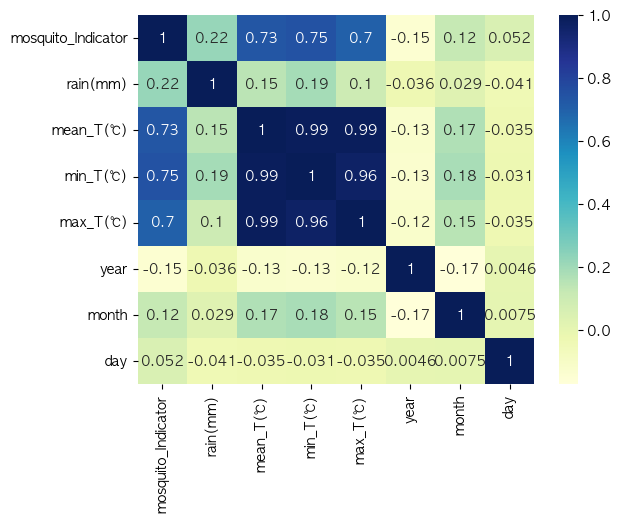

In [8]:
sns.heatmap(df_mos.corr(), annot=True, cmap='YlGnBu')

선형회귀 모델 구축

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df_mos.drop(['mosquito_Indicator'], axis=1).values
Y = df_mos['mosquito_Indicator']

model.fit(X, Y)

LinearRegression()

In [10]:
# 5. 검증
# y = ax + b
coef = model.coef_               # 직선의 기울기(a)
intercept = model.intercept_     # 직선의 절편(b)
score = model.score(X, Y)        # 추정된 회귀직선의 정확도(결정계수 r2)

#모델 평가 지표

from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f"선형회귀직선의 관계점수(R2): {score: .2f}")
print(f"선형회귀직선의 평균제곱오차(MSE): {mean_squared_error(Y, model.predict(X)): .2f}")
print(f"선형회귀직선의 평균절대오차(MAE): {mean_absolute_error(Y, model.predict(X)): .2f}")
print(f"선형회귀직선의 RMSE(Root Mean Squared Error): {np.sqrt(mean_squared_error(Y, model.predict(X))): .2f}")

선형회귀직선의 관계점수(R2):  0.57
선형회귀직선의 평균제곱오차(MSE):  37185.49
선형회귀직선의 평균절대오차(MAE):  150.08
선형회귀직선의 RMSE(Root Mean Squared Error):  192.84


모델을 이용한 예측

In [11]:
#모델에 10/6일의 온도 데이터 입력
model_predict = model.predict([[0.0, 14.0, 8.0, 19.0, 2023, 10, 6]])

print(f'10/6일 모기지수 예측값: {model_predict[0]: .2f}')

10/6일 모기지수 예측값:  102.62


RF, XGB 모델 확인

In [16]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model = RandomForestRegressor()

model.fit(X, Y)

model.score(X, Y)

0.9910429030354206

In [17]:
#모델에 10/6일의 온도 데이터 입력
model_predict = model.predict([[0.0, 14.0, 8.0, 19.0, 2023, 10, 6]])

print(f'10/6일 모기지수 예측값: {model_predict[0]: .2f}')

10/6일 모기지수 예측값:  108.59


In [18]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(X, Y)

model.score(X, Y)

0.9997720300424566

In [19]:
#모델에 10/6일의 온도 데이터 입력
model_predict = model.predict([[0.0, 14.0, 8.0, 19.0, 2023, 10, 6]])

print(f'10/6일 모기지수 예측값: {model_predict[0]: .2f}')

10/6일 모기지수 예측값:  167.37
